# Insurance Medical Cost Prediction
---

**Objective:**

We will explore a dataset of insurance data detailed below. We will build a model from scratch using Gradient Descent to predict the cost of treatment for individuals based on their age, sex, bmi and other information.


## Dataset Description


*   **age**: age of primary beneficiary
*   **sex**: insurance contractor gender, female, male
*   **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
*   **children**: Number of children covered by health insurance / Number of dependents
*   **smoker**: Smoking
*   **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
*   **charges**: Individual medical costs billed by health insurance

## 1. Data Loading

#### Import necessary python modules

We will need the following libraries:
 - Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
 - Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
 - Matplotlib — plotting & visualization.
 - scikit-learn — a tool for data mining and machine learning models. We need from this library the functions train_test_split and LinearRegression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### Read & visualize data
We should have the dataset on a csv file. To load the data to our code, we use **pandas** module, more specifically, the **read_csv** function.


In [ ]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 2. Exploratory Data Analysis



In [ ]:
rows = df.shape[0]
columns = df.shape[1]
print("Number of rows:" ,rows)
print("Number of columns:", columns)

Number of rows: 1338
Number of columns: 7


We used the function **info()**, to check:
 - data types (int, float, or object (e.g., string))
 - missing values
 - memory usage
 - number of rows and columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We used the function **describe()** to can check the mean, standard deviation, maximum, and minimum of each numerical feature (column)

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1335.000000,1338.000000,1338.000000
mean,39.207025,30.661423,1.094918,13270.422265
std,14.049960,6.101038,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.302500,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.687500,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Distribution of charges

First, let's look at the distribution of charges. This will help us to know how much patients spend on treatment on average.

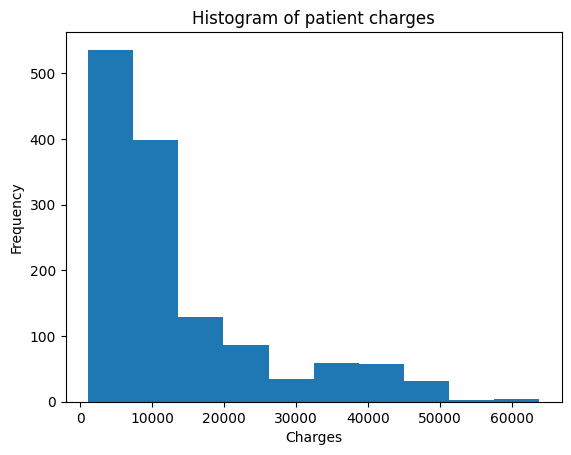

In [ ]:
plt.hist(df['charges'])
plt.title('Histogram of patient charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

#### Correlation between smoking and cost of treatment

Let's see if smokers spend more or less on treatment than non-smokers!

First, separate the dataset between 2: smokers and non_smokers, and then see how many smokers vs non-smokers we have.

In [ ]:
smokers = df[(df.smoker == 'yes')]
non_smokers = df[(df.smoker == 'no')]
print("Number of smokers: ",smokers.shape[0])
print("Number of non-smokers: ",non_smokers.shape[0])

Number of smokers:  274
Number of non-smokers:  1064


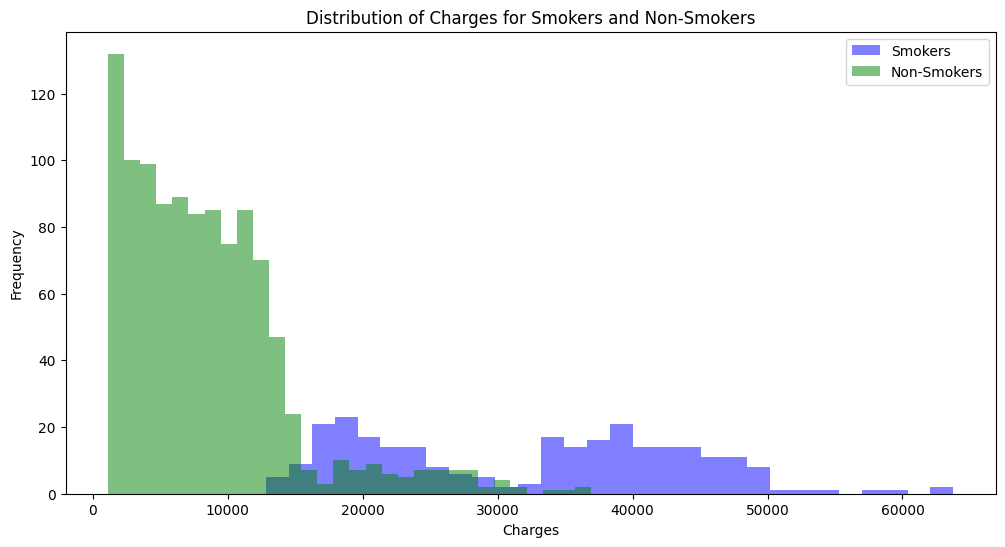

In [ ]:
plt.figure(figsize=(12, 6))

plt.hist(smokers['charges'],bins=30, alpha=0.5, label='Smokers', color='blue')
plt.hist(non_smokers['charges'], bins=30, alpha=0.5, label='Non-Smokers', color='green')

plt.title('Distribution of Charges for Smokers and Non-Smokers')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Based on the image, it appears that smokers tend to spend more on treatment than non-smokers.
We can see that the blue bars (smokers) extend further to the right than the orange bars (non-smokers), indicating higher charges for smokers. Additionally, the blue bars have a higher frequency in the higher charge ranges.

#### Correlation between age and cost of treatment


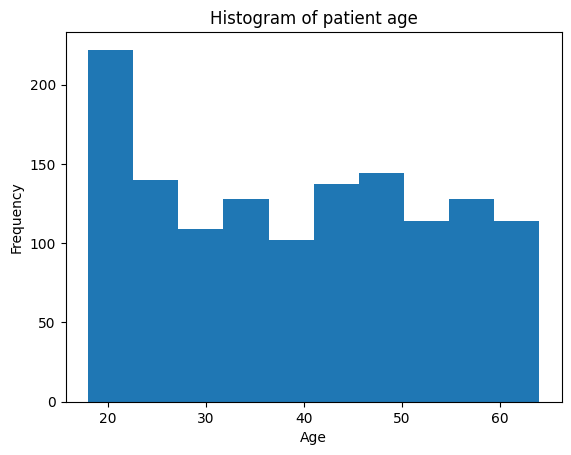

In [ ]:
plt.hist(df['age'])
plt.title('Histogram of patient age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

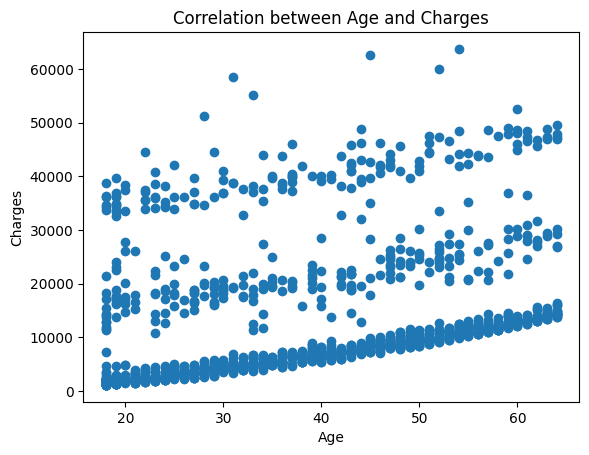

In [ ]:
plt.scatter(df['age'], df['charges'])
plt.title('Correlation between Age and Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

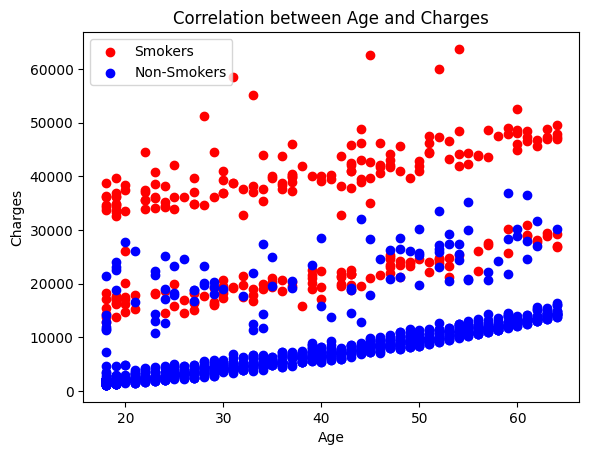

In [ ]:
plt.scatter(smokers['age'], smokers['charges'], color='red', label='Smokers')
plt.scatter(non_smokers['age'], non_smokers['charges'], color='blue', label='Non-Smokers')
plt.title('Correlation between Age and Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

#### Correlation between BMI and cost of treatment



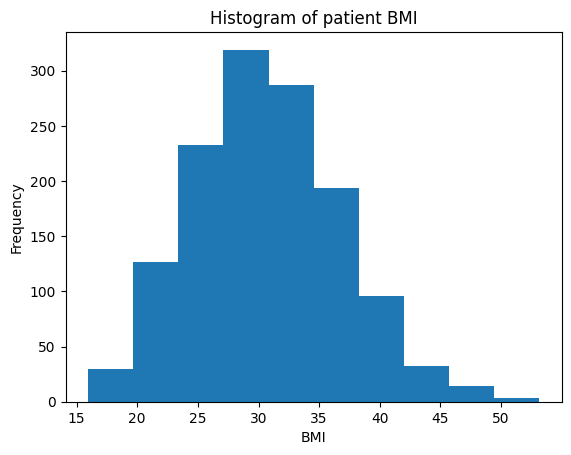

In [ ]:
plt.hist(df['bmi'])
plt.title('Histogram of patient BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

According to the chart above, obesity starts at BMI = 30. Let's investigate the impact of BMI on cost of treatment.
Separate the dataset between 4 datasets: one for obese, one for overweight, one for healthy, and one for underweight, and then, give the number of examples that we have for each of those classes.

In [ ]:
obese = df[(df.bmi >= 30)]
overweight = df[(df.bmi >= 25) & (df.bmi < 30)]
healthy = df[(df.bmi >= 18.5) & (df.bmi < 25)]
underweight = df[(df.bmi < 18.5)]
print("Number of obese: ",obese.shape[0])
print("Number of overweight: ",overweight.shape[0])
print("Number of healthy: ",healthy.shape[0])
print("Number of underweight: ",underweight.shape[0])

Number of obese:  705
Number of overweight:  385
Number of healthy:  225
Number of underweight:  20


To compare, plot the distribution of charges for all 3 groups (obese, overweight and healthy) in 1 plot, while showing `obese` data in red, `overweight` data in yellow and `healthy` data in green.

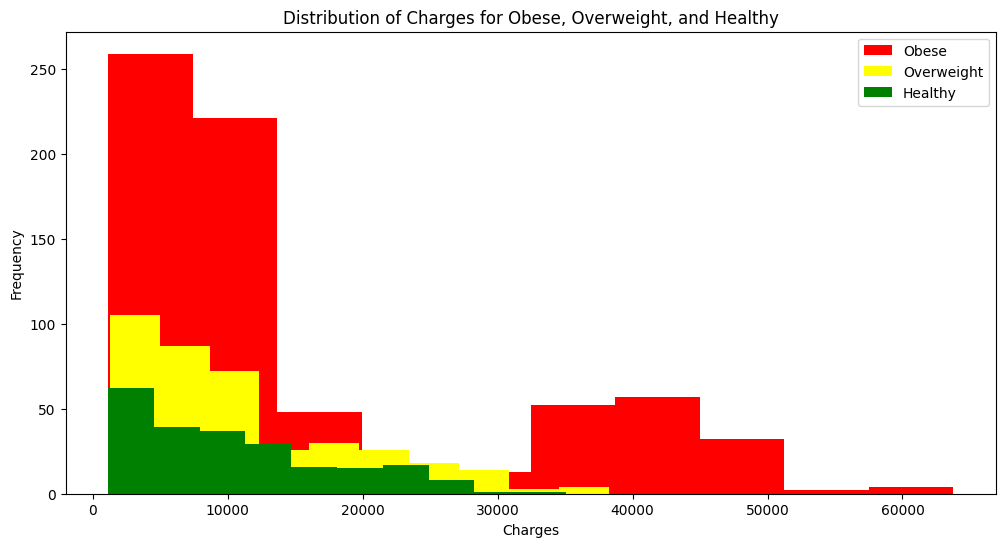

In [ ]:
plt.figure(figsize=(12, 6))

plt.hist(obese['charges'], label='Obese', color='red')
plt.hist(overweight['charges'], label='Overweight', color='yellow')
plt.hist(healthy['charges'], label='Healthy', color='green')

plt.title('Distribution of Charges for Obese, Overweight, and Healthy')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Patients with BMI above 30 spend more on treatment!

## 3. Data Preprocessing
"Garbage in, garbage out".

Data should be preprocessed and cleaned to get rid of noisy data.
Preprocessing includes:
 - dealing with missing data
   - remove whole rows (if they are not a lot)
   - infer (e.g., date of birth & age)
   - fill with mean, median, or even 0
 - removing unsued column(s)
 - convert categorical (non numerical) data into numerical
 - normalization: standarize data ranges for all features (e.g., between 0 and 1)



---



Start by seeing how many missing data you have in each column

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,3
children,0
smoker,0
region,0
charges,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1335 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1335 non-null   int64  
 1   sex       1335 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1335 non-null   int64  
 4   smoker    1335 non-null   object 
 5   region    1335 non-null   object 
 6   charges   1335 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.4+ KB


#### Remove unused columns

Let's remove the `region` column since we don't really care about it

In [ ]:
df.drop('region', axis=1, inplace=True)

#### Convert Categorical columns to numerical

*   We need to convert the sex column from male/female to 0/1.
*   We need to convert the smoker column from no/yes to 0/1.


Let's start with the sex column



In [ ]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

And now the smokers column

In [ ]:
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

#### Normalization

Let's scale all the columns by dividing by the maximum

In [ ]:
max_age = df['age'].max()
max_sex = df['sex'].max()
max_bmi = df['bmi'].max()
max_children = df['children'].max()
max_smoker = df['smoker'].max()
max_charges = df['charges'].max()

In [ ]:
df['age'] = df['age'] / max_age
df['sex'] = df['sex'] / max_sex
df['bmi'] = df['bmi'] / max_bmi
df['children'] = df['children'] / max_children
df['smoker'] = df['smoker'] / max_smoker
df['charges'] = df['charges'] / max_charges

## 4. MultiLinear Regression Model Training



#### Data splits

Before training, we need to split data into training (80%) & testing (20%) using a random_state of 42.
Print the shape of your training and testing data.

In [ ]:
X = df.drop('charges',axis = 1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1068, 5)
Shape of X_test: (267, 5)
Shape of y_train: (1068,)
Shape of y_test: (267,)


### Optimization Using Gradient Descent

We remind you that this is a multi linear regression problem <br>
* The equation is y = **a0** + **a1** * x1 + **a2** * x2 + **a3** * x3 + **a4** * x4 + **a5** * x5 <br>
In other words, we have the following: <br>
* charges = **a0** + **a1** * age + **a2** * sex + **a3** * bmi + **a4** * children + **a5** * smoker
*   We call the numpy vector a the vector containing the parameters a = [a0, a1, a2, a3, a4, a5]
* The goal is to find the best vector a


In [ ]:
def Gradient_descent(x, y, learning_rate, nb_iterations, initial_a):

  costs = []
  a = initial_a.astype(float)
  n = x.shape[0]

  for i in range(nb_iterations):
      y_pred = (a[0] + a[1] * x['age'] + a[2] * x['sex'] + a[3] * x['bmi'] + a[4] * x['children'] + a[5] * x['smoker'])

      cost = (1/n) * np.sum((y - y_pred)**2)
      costs.append(cost)

      d_a0 = -2 * np.sum(y - y_pred) / n
      d_a1 = -2 * np.sum(x['age'] * (y - y_pred)) / n
      d_a2 = -2 * np.sum(x['sex'] * (y - y_pred)) / n
      d_a3 = -2 * np.sum(x['bmi'] * (y - y_pred)) / n
      d_a4 = -2 * np.sum(x['children'] * (y - y_pred)) / n
      d_a5 = -2 * np.sum(x['smoker'] * (y - y_pred)) / n

      a[0] -= learning_rate * d_a0
      a[1] -= learning_rate * d_a1
      a[2] -= learning_rate * d_a2
      a[3] -= learning_rate * d_a3
      a[4] -= learning_rate * d_a4
      a[5] -= learning_rate * d_a5

      a0=a[0]
      a1=a[1]
      a2=a[2]
      a3=a[3]
      a4=a[4]
      a5=a[5]

  return costs, np.array([a0, a1, a2, a3, a4, a5])

Now that we have the function ready, we can use it to obtain the optimum coefficient values, and use them for future predictions.

Initialize the number of iteration as 10000, and the learning rate as 0.1. Then write the model equation you obtained

In [ ]:
learning_rate = 0.1
nb_iterations = 10000

costs, a = Gradient_descent(X_train, y_train,learning_rate,nb_iterations,np.array([0,0,0,0,0,0]))

a0, a1, a2, a3, a4, a5 = a

print(f"Model Equation:{a0} + {a1} * age + {a2} * sex + {a3} * bmi + {a4} * children + {a5} * smoker")

Model Equation:-0.17731121662795604 + 0.2534012388987373 * age + 0.0063630513099742865 * sex + 0.24684218984596076 * bmi + 0.042542331768510015 * children + 0.36661390495134716 * smoker


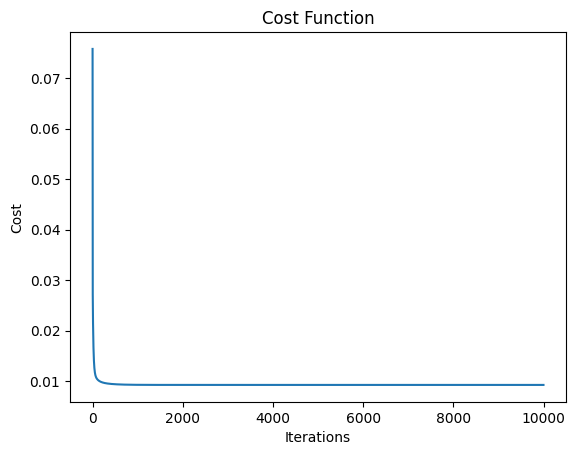

In [ ]:
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function')
plt.show()

###Predicting Using Vectorized Gradient Descent

Of course you noted some redundancy in the Gradient Descent implementation, this is why we opt to use a vectorized notation that might be a bit more difficult, but the concept remains the same.
This representation will be useful especially when your number of features starts to increase!

In [ ]:
def Gradient_descent_vectorized(x, y, learning_rate, nb_iterations, initial_a):
    a = initial_a
    n = x.shape[0]
    X_New = np.column_stack((np.ones(n), x))

    for i in range(nb_iterations):
        y_pred = np.dot(X_New, a)

        error = y_pred - y
        gradients = (2 / n) * np.dot(X_New.T, error)
        a = a - learning_rate * gradients

    return a

Train your model using the vectorized notation with the same initializations that you did previously. Then write the equation you obtained for your model.

In [ ]:
learning_rate = 0.1
nb_iterations = 10000

a = Gradient_descent_vectorized(X_train, y_train, learning_rate, nb_iterations, np.array([0, 0, 0, 0, 0, 0]))
a0, a1, a2, a3, a4, a5 = a

print(f"Model Equation: {a0} + {a1} * age + {a2} * sex + {a3} * bmi + {a4} * children + {a5} * smoker")

Model Equation: -0.17731121662795607 + 0.25340123889873734 * age + 0.0063630513099742865 * sex + 0.24684218984596076 * bmi + 0.042542331768510015 * children + 0.3666139049513471 * smoker


We should obtain the same result as above.

In [ ]:
def predict_medical_charges (a, x):

  charges = a[0] + a[1] * x['age'] + a[2] * x['sex'] + a[3] * x['bmi'] + a[4] * x['children'] + a[5] * x['smoker']
  return charges

In [ ]:
predict_medical_charges(a, X_train.iloc[0])

0.12813418555424994

###Linear Regression Model Evaluation

Now we will evaluate our model with the metrics that we studied during the course. In order to do so, we will calculate the predicted values on the test set.

In [ ]:
y_pred = predict_medical_charges(a, X_test)

Let's get the number of examples in the test set.

In [ ]:
n = X_test.shape[0]
print(n)

267


####Mean Absolute Error (MAE)

In [ ]:
mae = np.sum(np.abs(y_pred - y_test)) / n
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.0661370962003424


####Mean Squared Error (MSE)

In [ ]:
mse = np.sum((y_pred - y_test)**2) / n
print("Mean Squared Error:", mse)

Mean Squared Error: 0.00840241030958454


####Root Mean Squared Error (RMSE)

In [ ]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.0916646622727894


### Prediction Using Scikit Learn Library


Now to validate the results that we got, we will use the scikit learn library to give us the values of the coefficients that we got using Gradient Descent.

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

####Features importance (Coefficients)


In [ ]:
m_a1, m_a2, m_a3, m_a4, m_a5 = model.coef_
m_a0 = model.intercept_
print(f'Model Equation:{m_a0} + {m_a1} * age + {m_a2} * sex + {m_a3} * bmi + {m_a4} * children + {m_a5} * smoker')

print(f'Gradient Descent Equation: {a0} + {a1} * age + {a2} * sex + {a3} * bmi + {a4} * children + {a5} * smoker')

Model Equation:-0.17731121712023437 + 0.25340123892015703 * age + 0.006363051329000658 * sex + 0.2468421906447056 * bmi + 0.04254233178756274 * children + 0.36661390495979856 * smoker
Gradient Descent Equation: -0.17731121662795607 + 0.25340123889873734 * age + 0.0063630513099742865 * sex + 0.24684218984596076 * bmi + 0.042542331768510015 * children + 0.3666139049513471 * smoker


You should obtain the same coefficient values in the 3 approaches that we considered. Our computed values from GD are the same as the values that we got from sickit learn, which means the implementation was correct.

####Evaluation using Scikit learn

Now we will compute the same metrics we computed earlier but using the sklearn library.

In [ ]:
y_pred_sklearn = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_sklearn = mean_absolute_error(y_test, y_pred_sklearn)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
rmse_sklearn = np.sqrt(mse_sklearn)
print("Mean Absolute Error:", mae_sklearn)
print("Mean Squared Error:", mse_sklearn)
print("Root Mean Squared Error:", rmse_sklearn)

Mean Absolute Error: 0.06613709621551415
Mean Squared Error: 0.008402410307189204
Root Mean Squared Error: 0.09166466225972364


the values should be so close to the ones we got from the model you built yourself.

In [ ]:
r2_sklearn = model.score(X_test, y_test)
print("R2 Score:", r2_sklearn)

R2 Score: 0.8043792068989463




---
#Classification based on several features with Gradient Descent


Now, we will predict based on all the features that we have if the person is smoker or not a smoker, and we'll use GD as optimization tool.
We'll follow the same steps as above.

Split your data between training (80%) and testing (20%), and print the shapes of your training and testing data. Use random state of 42

In [ ]:
X = df.drop('smoker',axis = 1)
y = df['smoker']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1068, 5)
Shape of X_test: (267, 5)
Shape of y_train: (1068,)
Shape of y_test: (267,)


##Optimization using Gradient Descent

Now we will implement Gradient Descent to do this classification between smoker and non-smoker.

###Sigmoid Function

In [ ]:
def sigmoid(v):
  return 1 / (1 + np.exp(-v))

We remind you that this is a classification based on several features <br>
* The equation is y = sigmoid(**a0** + **a1** * x1 + **a2** * x2 + **a3** * x3 + **a4** * x4 + **a5** * x5) <br>
In other words, we have the following: <br>
* smoker = sigmoid(**a0** + **a1** * age + **a2** * sex + **a3** * bmi + **a4** * children + **a5** * charges)
* This represents the probability of a person being smoker given the features that we mentioned.
*   We call the numpy vector a the vector containing the parameters a = [a0, a1, a2, a3, a4, a5]
* The goal is to find the best vector a

Build the Gradient_descent_Classification function.

In [ ]:
def Gradient_descent_classification (x, y, learning_rate, nb_iterations, initial_a):

  costs = []
  a = initial_a.astype(np.float64)
  n = x.shape[0]

  for i in range(nb_iterations):
      z = a[0] + a[1]*x['age'] + a[2]*x['sex'] + a[3]*x['bmi'] + a[4]*x['children'] + a[5]*x['charges']

      y_pred = sigmoid(z)

      cost = -1 * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) / n
      costs.append(cost)

      error = y_pred - y
      a0_der = -1*np.sum(y - y_pred)/n
      a1_der = -1*np.sum(x['age'] * (y - y_pred))/n
      a2_der = -1*np.sum(x['sex'] * (y - y_pred))/n
      a3_der = -1*np.sum(x['bmi'] * (y - y_pred))/n
      a4_der = -1*np.sum(x['children'] * (y - y_pred))/n
      a5_der = -1*np.sum(x['charges'] * (y - y_pred))/n


      a[0] -= learning_rate * a0_der
      a[1] -= learning_rate * a1_der
      a[2] -= learning_rate * a2_der
      a[3] -= learning_rate * a3_der
      a[4] -= learning_rate * a4_der
      a[5] -= learning_rate * a5_der

      a0 = a[0]
      a1 = a[1]
      a2 = a[2]
      a3 = a[3]
      a4 = a[4]
      a5 = a[5]

  return costs, np.array([a0, a1, a2, a3, a4, a5])

Now, we will train our model. Set the number of iterations to 10000, the learning rate to 0.1, and print the equation of the model you obtained.

In [ ]:
learning_rate = 0.1
nb_iterations = 10000

costs, a = Gradient_descent_classification(X_train, y_train,learning_rate,nb_iterations,np.array([0,0,0,0,0,0]))

a0, a1, a2, a3, a4, a5 = a
print(f"y = sigmoid({a0} + {a1} * age + {a2} * sex + {a3} * bmi + {a4} * children + {a5} * charges)")

y = sigmoid(-0.7789277929120504 + -2.999906101327776 * age + -0.2636623561196345 * sex + -3.7235222716127194 * bmi + -0.49548211562326583 * children + 13.282627234362975 * charges)


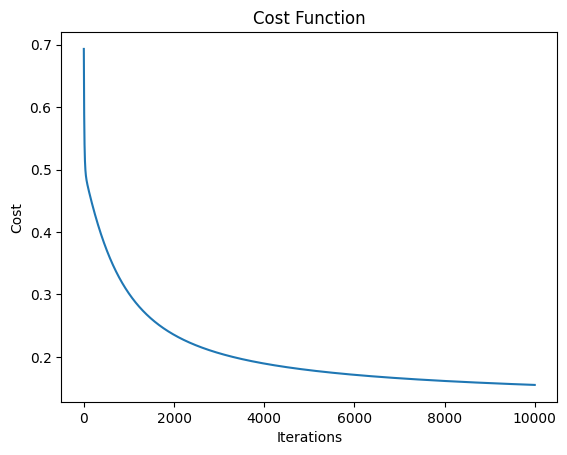

In [ ]:
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function')
plt.show()

Now to predict we implement the following function that takes multiple examples in one numpy array x, and the parameters a, and gives back the prediction made for each example.
<br>**Reminder:** If the output of the sigmoid function is >0.5, we consider the output is 1, otherwise, we consider it 0

In [ ]:
def predict_smoker(x, a):

  result = []
  for i in range(x.shape[0]):
    y_pred = sigmoid(a[0] + a[1] * x[i, 0] + a[2] * x[i, 1] + a[3] * x[i, 2] + a[4] * x[i, 3] + a[5] * x[i, 4])
    if y_pred > 0.5:
      result.append(1)
    else:
      result.append(0)

  return result

In [ ]:
#Test Your Zaka
y_pred = predict_smoker(X_test.values, a)

##Classifier Evaluation

###Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9063670411985019


###Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[199   3]
 [ 22  43]]
